In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

from torch_geometric.data import InMemoryDataset
from tqdm import tqdm

In [2]:
import os

In [3]:
import pandas as pd
from torch_geometric.data import Data

In [4]:
df = pd.read_csv('AirPollutionSeoul/Measurement_summary.csv')

In [5]:
df['Station code'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
      dtype=int64)

In [6]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [7]:
df.drop_duplicates(subset=['Latitude', 'Longitude'])

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
25905,2017-01-01 00:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0
51810,2017-01-01 00:00,103,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850,0.005,0.039,0.002,1.4,70.0,68.0
77714,2017-01-01 00:00,104,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848,0.005,0.045,0.003,0.6,73.0,46.0
103610,2017-01-01 00:00,105,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679,0.005,0.044,0.004,1.0,81.0,44.0
129500,2017-01-01 00:00,106,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905598,0.005,0.066,0.003,1.5,71.0,62.0
155405,2017-01-01 00:00,107,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659,0.005,0.049,0.002,0.9,64.0,40.0
181296,2017-01-01 00:00,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.004,0.045,0.003,0.8,68.0,63.0
207190,2017-01-01 00:00,109,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885,0.006,0.052,0.002,1.1,76.0,50.0
233094,2017-01-01 00:00,110,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023,0.005,0.040,0.002,0.8,91.0,50.0


In [8]:
df1 = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_info.csv')

In [9]:
df1.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


In [10]:
df2 = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_item_info.csv')

In [11]:
df2.head()

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


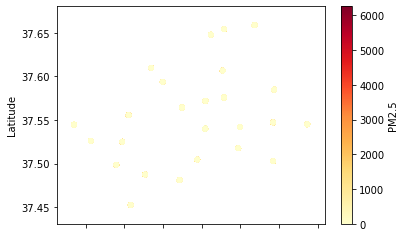

In [12]:
df.plot(x="Longitude", y="Latitude", kind="scatter", c="PM2.5", colormap="YlOrRd")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
Measurement date    647511 non-null object
Station code        647511 non-null int64
Address             647511 non-null object
Latitude            647511 non-null float64
Longitude           647511 non-null float64
SO2                 647511 non-null float64
NO2                 647511 non-null float64
O3                  647511 non-null float64
CO                  647511 non-null float64
PM10                647511 non-null float64
PM2.5               647511 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [14]:
station = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_station_info.csv')

In [15]:
station

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


In [16]:
station.loc[:, 'Latitude']

0     37.572016
1     37.564263
2     37.540033
3     37.609823
4     37.593742
5     37.555580
6     37.541864
7     37.547180
8     37.575743
9     37.584848
10    37.606719
11    37.647930
12    37.654192
13    37.658774
14    37.525939
15    37.544640
16    37.498498
17    37.452357
18    37.525007
19    37.480917
20    37.487355
21    37.504547
22    37.517528
23    37.502686
24    37.544962
Name: Latitude, dtype: float64

In [17]:
import matplotlib.pyplot as plt

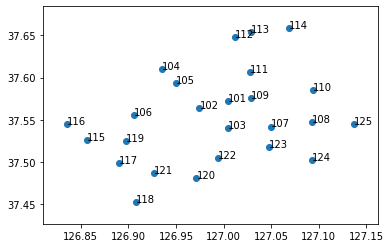

In [18]:
y = station.loc[:, 'Latitude']
z = station.loc[:, 'Longitude']
n = station.loc[:, 'Station code']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [19]:
station101 = df[df['Station code'] == 101]

In [20]:
station101['Measurement date'] = pd.to_datetime(station101['Measurement date'], format='%Y-%m-%d %H:%M')

C:\Users\ideapad 330\Anaconda3\envs\AIML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
station101.set_index(['Measurement date'], inplace=True)

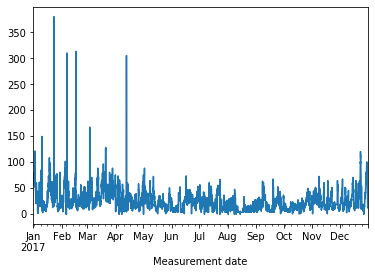

In [22]:
station101.iloc[0 : 24 * 365]['PM2.5'].plot()

In [23]:
vars()['a'] = 1

In [24]:
station = dict()
for i in [101, 116, 118, 125, 114]:
    station[f'{i}'] = df[df['Station code'] == i].iloc[0 : 24 * 365]

In [25]:
station['101']

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.005,0.016,0.027,0.4,21.0,11.0
8756,2017-12-31 20:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.022,0.021,0.5,20.0,11.0
8757,2017-12-31 21:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.021,0.022,0.6,25.0,12.0
8758,2017-12-31 22:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.006,0.021,0.021,0.5,28.0,15.0


In [26]:
data = station['101']

In [27]:
data.iloc[0, 5:].tolist()

[0.004, 0.059000000000000004, 0.002, 1.2, 73.0, 57.0]

In [28]:
data_list = []

In [29]:
edge_index = torch.tensor([[1, 2, 3, 4, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 1, 2, 3, 4]], dtype=torch.long)
for i in range(5):
    A = []
    L = []
    for code in [101, 116, 118, 125, 114]:
        data = station[f'{code}']
        A.append(data.iloc[i, 5:].tolist())
    L.append(station[f'101'].iloc[i+1,10].tolist())
#     print(A)
#     print(L)
#     print('-'*50)
    x = torch.tensor(A, dtype=torch.float)
    y = torch.tensor(L, dtype=torch.float)
    data = Data(x=x, y=y, edge_index=edge_index)
    data_list.append(data)

In [30]:
data_list

[Data(edge_index=[2, 8], x=[5, 6], y=[1]),
 Data(edge_index=[2, 8], x=[5, 6], y=[1]),
 Data(edge_index=[2, 8], x=[5, 6], y=[1]),
 Data(edge_index=[2, 8], x=[5, 6], y=[1]),
 Data(edge_index=[2, 8], x=[5, 6], y=[1])]

In [31]:
class AirPollutionData(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super(AirPollutionData, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return []
    @property
    def processed_file_names(self):
        return ['AirPollution2.p']

    def download(self):
        pass
    
    def process(self):
        
        data_list = []

        # process by session_id
        
        edge_index = torch.tensor([[1, 2, 3, 4, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 1, 2, 3, 4]], dtype=torch.long)
        for i in range(365*24 - 1):
            A = []
            L = []
            for code in [101, 116, 118, 125, 114]:
                data = station[f'{code}']
                A.append(data.iloc[i, 5:].tolist())
            L.append(station[f'101'].iloc[i+1,10].tolist())

            x = torch.tensor(A, dtype=torch.float)
            y = torch.tensor(L, dtype=torch.float)
            data = Data(x=x, y=y, edge_index=edge_index)
            
            data_list.append(data)
        
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

In [32]:
dataset = AirPollutionData(root='../')

In [33]:
dataset

AirPollutionData(8759)

In [34]:
dataset = dataset.shuffle()
train_dataset = dataset[:6000]
val_dataset = dataset[6000:7500]
test_dataset = dataset[7500:]
len(train_dataset), len(val_dataset), len(test_dataset)

(6000, 1500, 1259)

In [35]:
from torch_geometric.data import DataLoader
batch_size= 256
train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [43]:
data = dataset[0]

In [44]:
data.num_nodes

5

In [45]:
data.num_edges

8

In [46]:
data.num_node_features

6

In [47]:
data.is_undirected()

True

In [51]:
dataset = dataset.shuffle()

In [57]:
perm = torch.randperm(len(dataset))
dataset = dataset[perm]

In [52]:
train_dataset = dataset[:540]

In [53]:
test_dataset = dataset[540:700]

In [58]:
data

Data(edge_index=[2, 8], x=[5, 6], y=[1])